In [27]:
#Importing necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import warnings as wr
wr.filterwarnings("ignore")

In [28]:
#Loading the dataset
data = pd.read_csv("/content/Mall_Customers.csv")

In [29]:
#Data cleaning
print("Missing values before imputation:")
data.isnull().sum()

Missing values before imputation:


CustomerID                 0
Gender                     0
Age                        0
Annual Income (k$)        10
Spending Score (1-100)     0
dtype: int64

In [30]:
#Impute missing values using forward fill (ffill)
data.fillna(method='ffill', inplace=True)

In [31]:
print("Missing values after imputation:")
data.isnull().sum()

Missing values after imputation:


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [32]:
#Normalization
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

In [33]:
data['Spending_Income_Ratio'] = data['Spending Score (1-100)'] / data['Annual Income (k$)']

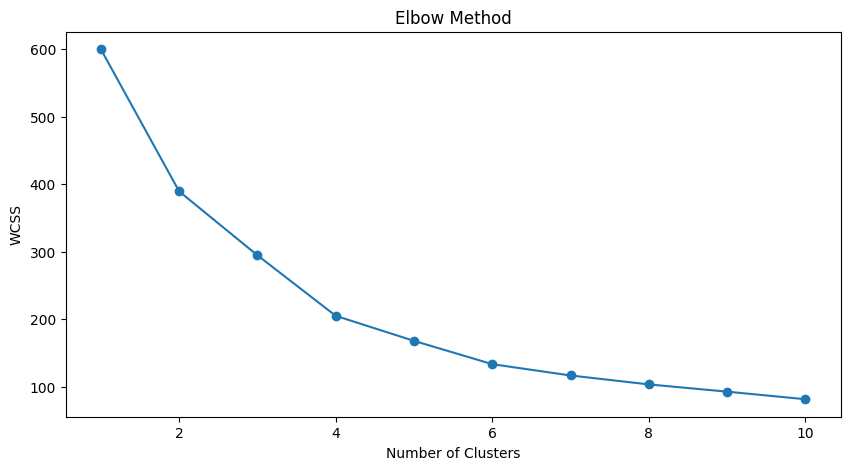

In [34]:
#Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

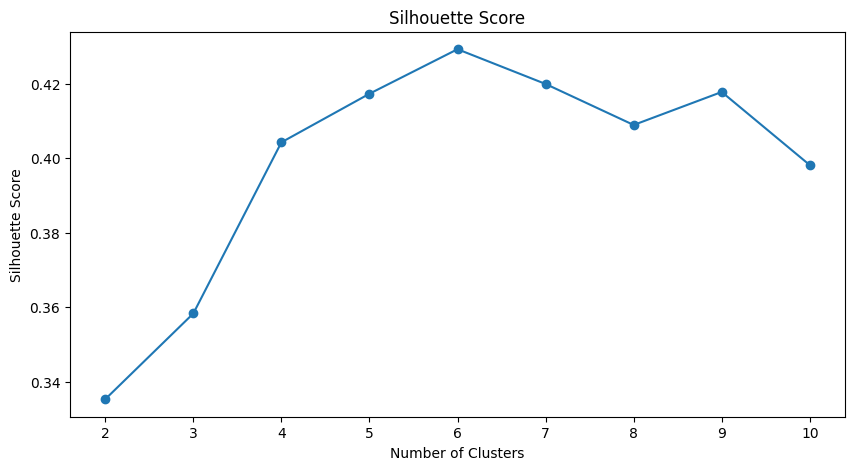

In [35]:
# Silhouette Score
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(data_scaled)
    silhouette_avg = silhouette_score(data_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [36]:
n_clusters = 5

#K Means clustering algorithm
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)
cluster_means = data.groupby('Cluster').mean()
cluster_counts = data['Cluster'].value_counts()

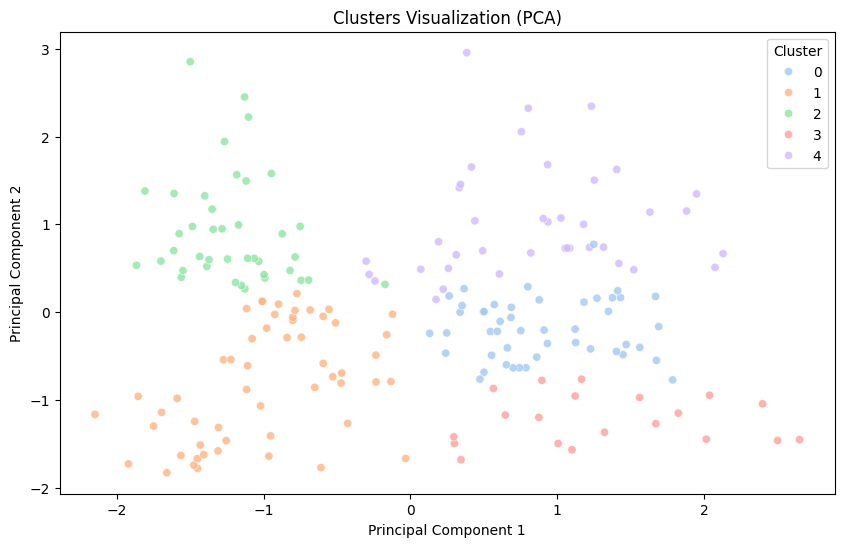

In [37]:
#Visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)
data['PC1'] = data_pca[:, 0]
data['PC2'] = data_pca[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=data, palette='pastel', alpha=0.8)

plt.title('Clusters Visualization (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [24]:
print("Cluster Profiles:")
print(cluster_means)

Cluster Profiles:
         CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
Cluster                                                                      
0         83.872340  55.638298           54.382979               48.851064   
1         55.648148  25.185185           41.092593               62.240741   
2        161.025000  32.875000           86.100000               81.525000   
3         24.100000  46.250000           26.700000               18.350000   
4        159.743590  39.871795           85.897436               19.358974   

         Spending_Income_Ratio       PC1       PC2  
Cluster                                             
0                     0.923161  0.899998 -0.190539  
1                     2.007658 -0.984129 -0.794508  
2                     0.974041 -1.212227  0.916316  
3                     0.694334  1.315153 -1.226583  
4                     0.234325  0.846899  1.018918  
